# CS4243 - Lab Session 3
Computer Vision & Pattern Recognition

Week 5

Author: Dr. Amirhassan MONAJEMI. Modified by: Soo Han

## Welcome! 👋

This notebook contains the tutorials for our `third` lab session. The following materials are covered:
- Filters in Spatial Domain
- Fourier Transform
- Filters in Fourier Domain

#### For all lab activities, you can refer to utils_2023.ipynb and set3 notebooks available in Canvas 

In [1]:
# importing modules 
import cv2     # open cv 2 package
import numpy as np
from matplotlib import pyplot as plt

# Part 1: Review of utils_2023.ipynb notebook

- Open and review functions exist in utils_2023 notebook
- Review the test results generated by that notebook
- If you have already studied through that notebook, move onto the next parts!

# Part 2: Median Filters

Two images below have been conducted with salt 'n pepper (dot noise) with different levels of intensity
1. noisy_car5.jpg
2. noisy_car15.jpg

We will see the effect of Median filter on these two images following these guidelines:
- use open cv's medianBlur function, 
- the 2nd parameter, ksize, is the Median window's size
- filter each image with ksize= 3 , 5 , 15
- see the results, discuss the results

In [2]:
# Import noisy_car5.jpg Image
im_file = '../Downloads/CS4243_2023_images_small/noisy_car5.jpg'
img = cv2.imread(im_file) 

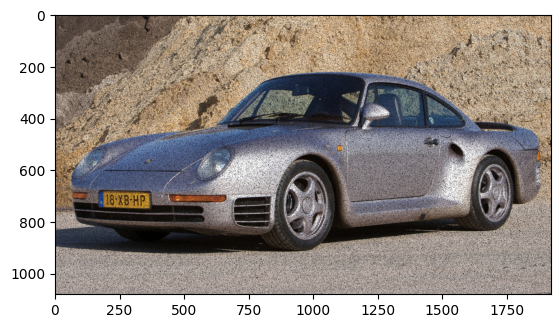

In [3]:
img = cv2.imread(im_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img) 

In [4]:
# Blur the image using openCV medianBlur

### START CODE HERE ###
filtered_img_size3 = cv2.medianBlur(img, 3)
filtered_img_size5 = cv2.medianBlur(img, 5)
filtered_img_size15 = cv2.medianBlur(img, 15)
### END CODE HERE ###

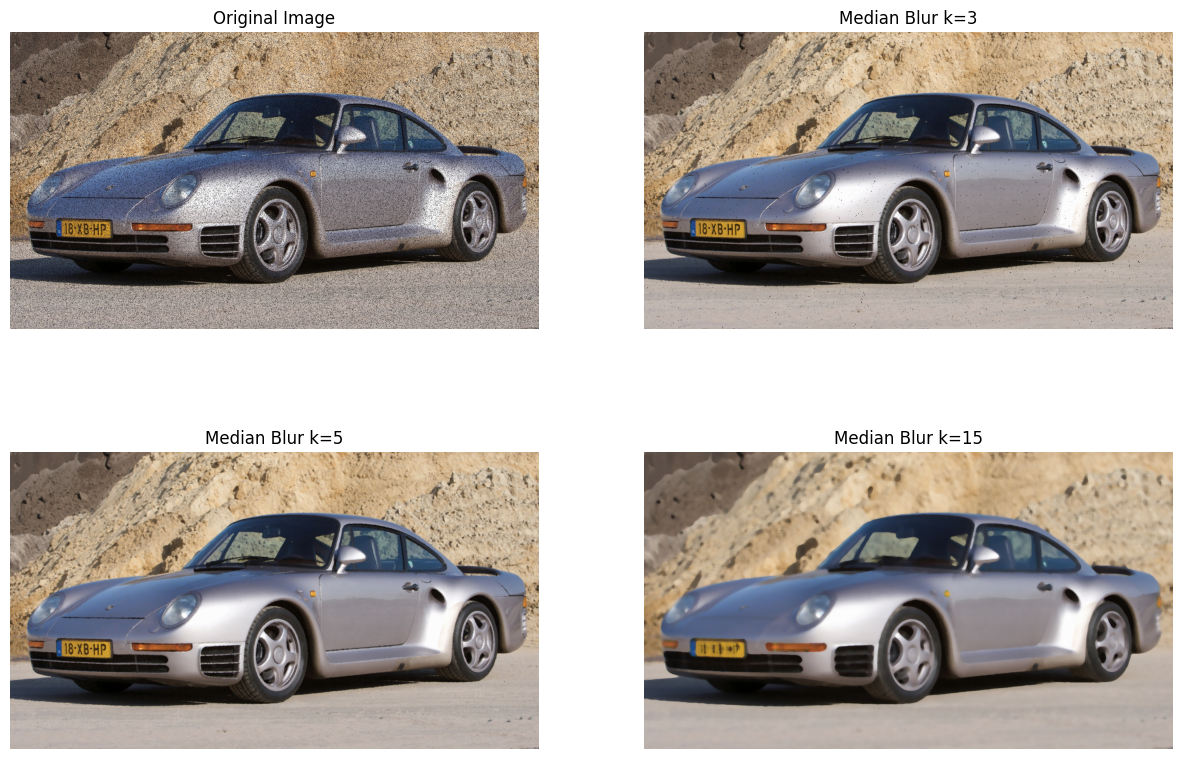

In [5]:
# Display the images
plt.figure(figsize=(15, 10))
plt.subplot(221), plt.imshow(img), plt.title('Original Image'), plt.axis('off') 
plt.subplot(222), plt.imshow(filtered_img_size3), plt.title('Median Blur k=3'), plt.axis('off')
plt.subplot(223), plt.imshow(filtered_img_size5), plt.title('Median Blur k=5'), plt.axis('off')
plt.subplot(224), plt.imshow(filtered_img_size15), plt.title('Median Blur k=15'), plt.axis('off')
plt.show()

Repeat this process for noisy_car15.jpg can observe the results

In [6]:
im_file = '../Downloads/CS4243_2023_images_small/noisy_car15.jpg'
img = cv2.imread(im_file) 

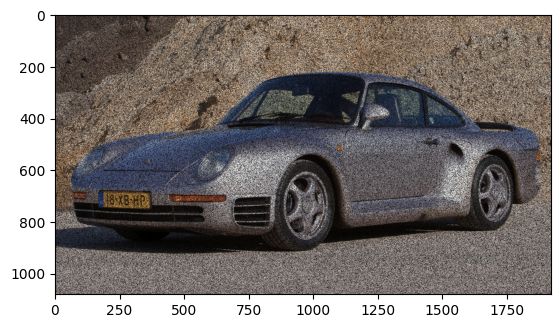

In [7]:
img = cv2.imread(im_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img) 

In [8]:
# Blur the image using openCV medianBlur

### START CODE HERE ###
filtered_img_size3 = cv2.medianBlur(img, 3)
filtered_img_size5 = cv2.medianBlur(img, 5)
filtered_img_size15 = cv2.medianBlur(img, 15)
### END CODE HERE ###

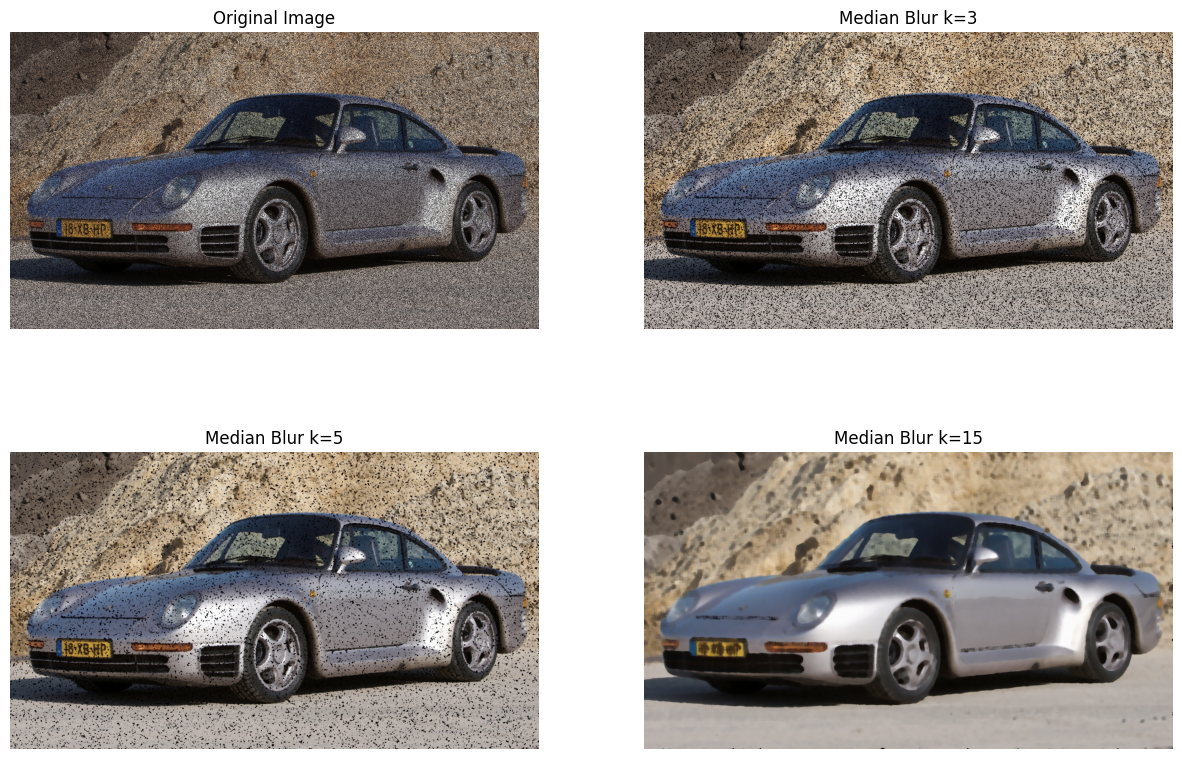

In [9]:
# Display the images
plt.figure(figsize=(15, 10))
plt.subplot(221), plt.imshow(img), plt.title('Original Image'), plt.axis('off') 
plt.subplot(222), plt.imshow(filtered_img_size3), plt.title('Median Blur k=3'), plt.axis('off')
plt.subplot(223), plt.imshow(filtered_img_size5), plt.title('Median Blur k=5'), plt.axis('off')
plt.subplot(224), plt.imshow(filtered_img_size15), plt.title('Median Blur k=15'), plt.axis('off')
plt.show()

# Part 3: Fourier Transform

In this exercise, we will observe the power spectral density and phase of an image after Fourier transform, and see the results of fft shift and log scale visualization.

Follow these steps:
- Use a gray level image 
- Develop an FFT function that would be able to show you the FFT results, and derive magnitude and phase information
- Compute the image power in the spatial domain and FFT domain. 
- Compute the sum of all the pixels of your image and compare it with index [0,0] of the FFT matrix before shift
- Discuss it, why?

*The output of your FFT will be a matrix of complex numbers. Complex numbers in its polar coordinate form have both magnitude and a phase (direction). Define `magnitude_spectrum` which captures the logarithm of the magnitude information of the FFT output and define `phase` which captures the phase information of the complex number*.

#### ---------------- you may try images below too ----------------

1. img = cv.imread('high_spat_freq.bmp', 0)
2. img = cv.imread('low_spat_freq.bmp', 0) 
3. img = cv.imread('vertical_texture.bmp', 0)
4. img = cv.imread('diag_texture.bmp', 0)
5. img = cv.imread('IMG_plain.JPG', 0) 
6. img = cv.imread('hor_texture.jpg ', 0)

In [10]:
#### Do not modify this function ####
def ready_2_show(a, level=255):
    a = ( a - np.min(a) ) / (np.max(a) - np.min(a)) 
    a = a * level
    return np.uint8(a)
#### Do not modify this function ####

In [11]:
#### Do not modify this function ####
def am_power(a):
    dim1 = a.shape
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]        
    pa = np.sum( a ** 2.0) / sz    
    
    return pa
#### Do not modify this function ####

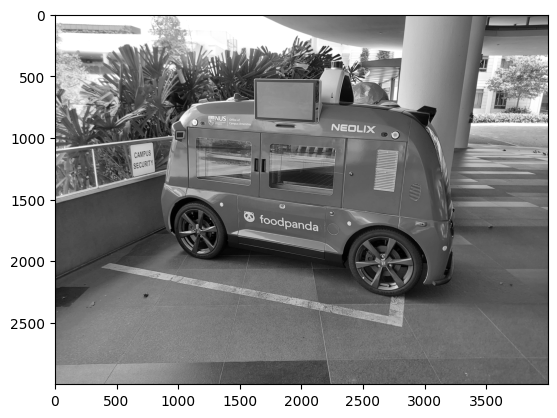

In [43]:
# Import your *grayscale* image and display it

### START CODE HERE ###
grayim_file = '../Downloads/CS4243_2023_images_small/20220719_132627.jpg'
grayimg = cv2.imread(grayim_file, 0)
# grayimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.imshow(grayimg, cmap = 'gray')
### END CODE HERE ###

In [63]:
# Develop an FFT function that would be able to show you the FFT results, and derive magnitude and phase information

### START CODE HERE ###
f = np.fft.fft2(grayimg)# Output of FFT
fshift = np.fft.fftshift(f)# Shifted output of FFT
phase = np.angle(fshift)# Phase extracted from fshift, tells where is direction of freq waves
magnitude_spectrum = np.log(np.abs(fshift))# Calculated using fshift for easy visualization
### END CODE HERE ###

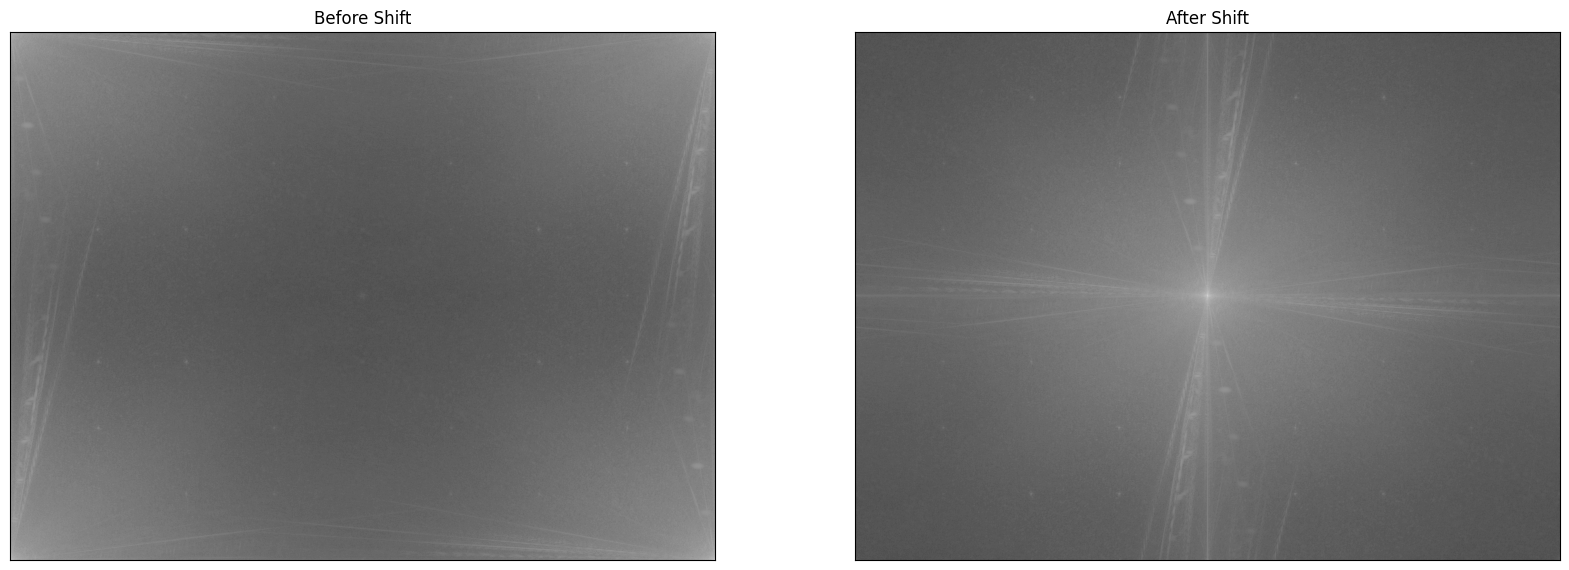

In [64]:
# Show magnitude spectrum before and after shift for comparison

plt.figure(figsize=(20,20))
# Insert magnitude spectrum before shift inside ready_2_show()
plt.subplot(121),plt.imshow(ready_2_show(np.log(np.abs(f))), cmap = 'gray')
plt.title('Before Shift'), plt.xticks([]), plt.yticks([])
# Insert magnitude spectrum after shift inside ready_2_show()
plt.subplot(122),plt.imshow(ready_2_show(np.log(np.abs(fshift))), cmap = 'gray')
plt.title('After Shift'), plt.xticks([]), plt.yticks([])
plt.show()

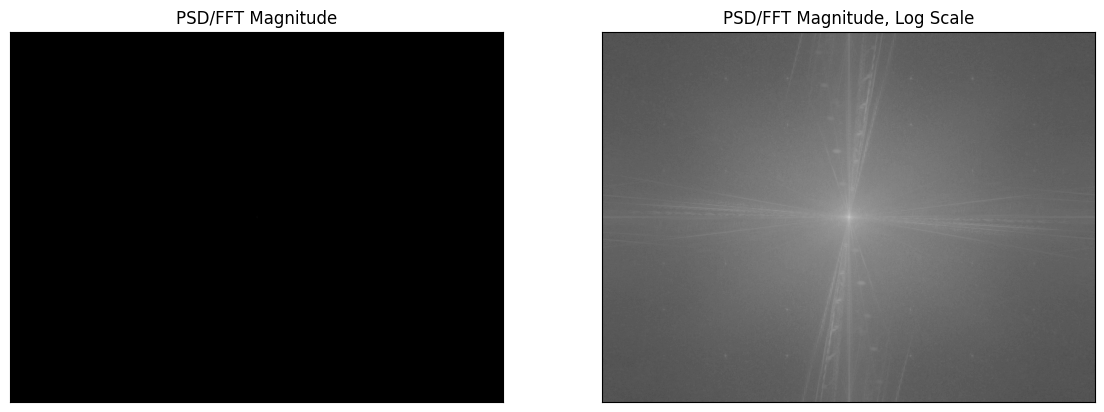

In [69]:
# Show the shifted magnitude and shifted log magnitude for comparison

plt.figure(figsize=(14,10))
# Insert magnitude spectrum without log transform inside ready_2_show()
plt.subplot(121),plt.imshow(ready_2_show(np.abs(fshift)), cmap = 'gray')
plt.title('PSD/FFT Magnitude'), plt.xticks([]), plt.yticks([])
# Insert magnitude spectrum with log transform inside ready_2_show()
plt.subplot(122),plt.imshow(ready_2_show(magnitude_spectrum), cmap = 'gray')
plt.title('PSD/FFT Magnitude, Log Scale'), plt.xticks([]), plt.yticks([])
plt.show()

In [66]:
# Compute the image power in the spatial domain and FFT domain. 

### START CODE HERE ###
im_power_spatial = am_power(grayimg)
im_power_fft = am_power(fshift)
### END CODE HERE ###
print(im_power_spatial, im_power_fft)

16426.0727285 (160445896694.00012-7.146368026733399e-07j)


In [71]:
# Compute the sum of all the pixels of your image and compare it with index [0,0] of the PSD matrix before shift

### START CODE HERE ###
sum_pixels = np.sum(grayimg)
print(sum_pixels)
print(f[0, 0])
### END CODE HERE ###

1397403048
(1397403048+0j)


# Part 4: Filtering in Fourier Domain

Explore using filters in the Fourier domain and complete the following tasks:
1. Compare the ideal lowpass and Gaussian lowpass filters, resulting images should be visualized and reviewed 
2. Compare Gaussian, ideal, and Butterworth high pass filters
3. Compare Butterworth and ideal bandpass filters
4. Apply Butterworth bandpass filter, change the filter order parameter and see the resulting differences

Follow this procedure to apply FFT domain filtering on your image :
```
- read the image
- compute its FFT
- apply fft shift
- get the absolute value/PSD and phase of the FFT
- design your filter
- apply your filter on the absolute value matrix (element-wise multiplication)
- make the complex FFT matrix
- apply inverse shift
- apply inverse FFT
- show the resulting filtered image
```

#### Tips:

Use the FFT domain filters available in utils_2023 notebook

Available filters:
 - ideal lowpass, highpass, bandpass, band eject
 - Gaussian lowpass and highpass
 - Butterworth lowpass, highpass, bandpass, bandreject

Compare the ideal lowpass and Gaussian lowpass filters, resulting images should be visualized and reviewed

Compare Gaussian, ideal, and Butterworth high pass filters

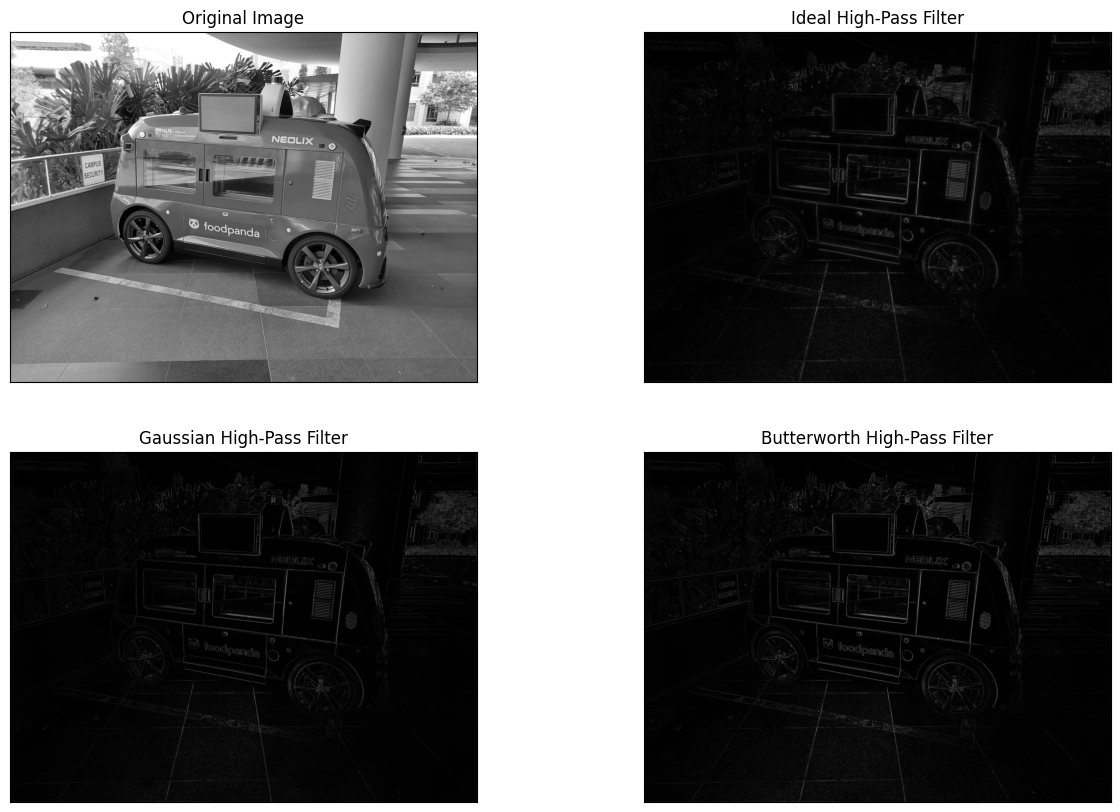

In [61]:
# Compare Gaussian, ideal, and Butterworth high pass filters

# Define your filters
idealHighPass = lambda M, N, D0 : 1- idealLowPass(M,N,D0)
GaussHighPass = lambda M, N, D0: 1- GaussLowPass(M, N, D0)

def ButterworthLowPass(M, N, D0, n_o):
    #  
    filter = np.zeros((M, N))
    # normalized cut_off frequency is mapped to real index
    D0 = D0 * min(M,N) / 2
    n_o = 2 * n_o
    for i in range(M):
        for j in range(N):
            d = ( (i-M/2)**2 + (j-N/2)**2 )**0.5
            filter[i,j]= 1 / ( 1 + (d/D0)**n_o )
            
    return filter

ButterworthHighPass = lambda M, N, D0, n_o: 1 - ButterworthLowPass(M, N, D0, n_o)

# Conduct filtering in Fourier dimension
filename = '../Downloads/CS4243_2023_images_small/20220719_132627.jpg'
img = cv2.imread(filename, 0)
img_dft = np.fft.fft2(img)
img_dft_shift = np.fft.fftshift(img_dft)
dft_shift_abs = np.abs(img_dft_shift)
dft_phase = np.angle(img_dft_shift)
M = img.shape

f_idealhp = idealHighPass(M[0], M[1], 0.4)
f_gausshp = GaussHighPass(M[0], M[1], 0.4)
f_butterworthhp = ButterworthHighPass(M[0], M[1], 0.5, 1)

filteredIdealHP = np.multiply(dft_shift_abs, f_idealhp)
filteredGaussHP = np.multiply(dft_shift_abs, f_gausshp)
filteredButterworthHP = np.multiply(dft_shift_abs, f_butterworthhp)

z_idealHP = np.multiply(filteredIdealHP, np.exp((1j) * (dft_phase)))
z_gausshp = np.multiply(filteredGaussHP, np.exp((1j) * (dft_phase)))
z_butterworthhp = np.multiply(filteredButterworthHP, np.exp((1j) * (dft_phase)))

idft_shift_idealhp = np.fft.ifftshift(z_idealHP)
idft_shift_gausshp = np.fft.ifftshift(z_gausshp)
idft_shift_butterworthhp = np.fft.ifftshift(z_butterworthhp)



ideal_hp = np.abs(np.fft.ifft2(idft_shift_idealhp))
gauss_hp = np.abs(np.fft.ifft2(idft_shift_gausshp))
butterworth_hp = np.abs(np.fft.ifft2(idft_shift_butterworthhp))

# Visualize your images
plt.figure(figsize=(15,10))
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(ideal_hp, cmap = 'gray')
plt.title('Ideal High-Pass Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(gauss_hp, cmap = 'gray')
plt.title('Gaussian High-Pass Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(butterworth_hp, cmap = 'gray')
plt.title('Butterworth High-Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

Compare Butterworth and ideal bandpass filters

In [ ]:
# Compare Butterworth and ideal bandpass filters

# Define your filters

def ButterworthBandPass(M, N, D0, D1, n_o):
    #  
    filter = ButterworthLowPass(M, N,D0,n_o)
    filter = ButterworthLowPass(M, N,D1,n_o) - filter
        
    filter = filter * (1/np.max(filter))
    
    return filter

# Conduct filtering in Fourier dimension
filename = '../Downloads/CS4243_2023_images_small/20220719_132627.jpg'
img = cv2.imread(filename, 0)
img_dft = np.fft.fft2(img)
img_dft_shift = np.fft.fftshift(img_dft)
dft_shift_abs = np.abs(img_dft_shift)
dft_phase = np.angle(img_dft_shift)
M = img.shape

f_idealbp = 
f_butterworthbp = ButterworthBandPass(M[0], M[1], 0.05, 0.2, 2)

filteredIdealBP = np.multiply(dft_shift_abs, f_idealbp)
filteredButterworthBP = np.multiply(dft_shift_abs, f_butterworthbp)

z_idealBP = np.multiply(filteredIdealBP, np.exp((1j) * (dft_phase)))
z_butterworthbp = np.multiply(filteredButterworthBP, np.exp((1j) * (dft_phase)))

idft_shift_idealbp = np.fft.ifftshift(z_idealHP)
idft_shift_butterworthbp = np.fft.ifftshift(z_butterworthbp)



ideal_bp = np.abs(np.fft.ifft2(idft_shift_idealbp))
butterworth_bp = np.abs(np.fft.ifft2(idft_shift_butterworthbp))

# Visualize your images
plt.figure(figsize=(15,10))
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(ideal_bp, cmap = 'gray')
plt.title('Ideal Band-Pass Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(butterworth_bp, cmap = 'gray')
plt.title('Butterworth Band-Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

Apply Butterworth bandpass filter, change the filter order parameter and see the resulting differences

In [62]:
# Apply Butterworth bandpass filter, change the filter order parameter and see the resulting differences

# Define your filters

# Conduct filtering in Fourier dimension
butterworth_bp1 = ButterworthBandPass(M[0], M[1], 0.05, 0.2, 1)
butterworth_bp2 = ButterworthBandPass(M[0], M[1], 0.05, 0.2, 2)
butterworth_bp3 = ButterworthBandPass(M[0], M[1], 0.05, 0.2, 3)
butterworth_bp4 = ButterworthBandPass(M[0], M[1], 0.05, 0.2, 4)

# Visualize your images
plt.figure(figsize=(15,10))
plt.subplot(221),plt.imshow(butterworth_bp1, cmap = 'gray')
plt.title('Filter Order 1'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(butterworth_bp2, cmap = 'gray')
plt.title('Filter Order 2'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(butterworth_bp3, cmap = 'gray')
plt.title('Filter Order 3'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(butterworth_bp4, cmap = 'gray')
plt.title('Filter Order 4'), plt.xticks([]), plt.yticks([])
plt.show()

NameError: name 'ButterworthBandPass' is not defined

## The end of lab 5 notebook


In [ ]:
cv2.waitKey()
cv2.destroyAllWindows()